# Sentiment Analysis

## The Data

Source: https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset/data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

In [3]:
#!pip install chardet

In [4]:
import chardet

# Open the file in binary mode and detect encoding
with open('train.csv', 'rb') as file:
    result = chardet.detect(file.read(10000))  # Read a sample of the file
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [5]:
train_df = pd.read_csv('train.csv', encoding='latin1')
test_df = pd.read_csv('test.csv', encoding='latin1')
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


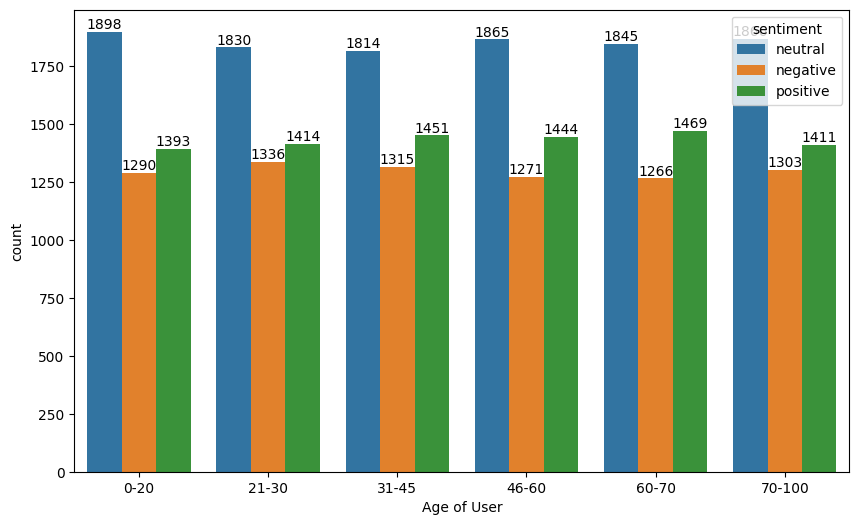

In [7]:
ax = sns.countplot(data = train_df, x ="Age of User", hue = "sentiment")
for p in ax.containers:
    ax.bar_label(p)

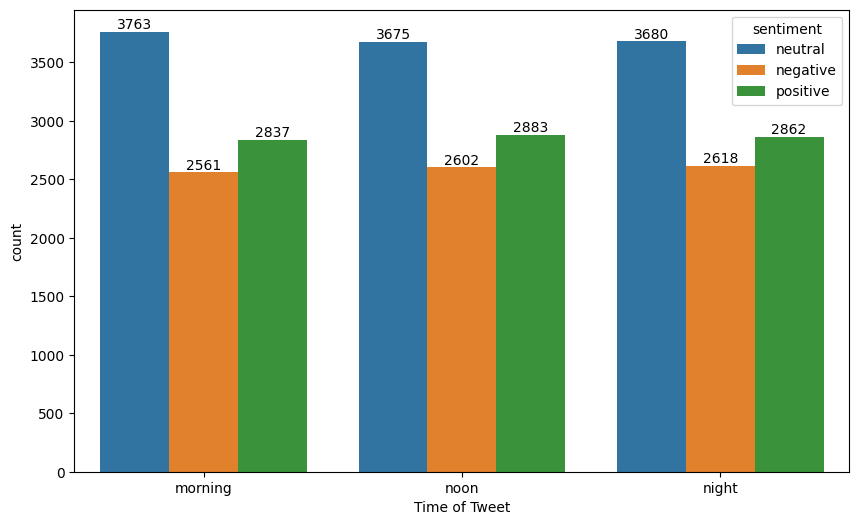

In [11]:
ax = sns.countplot(data = train_df, x ="Time of Tweet", hue = "sentiment")
for p in ax.containers:
    ax.bar_label(p)

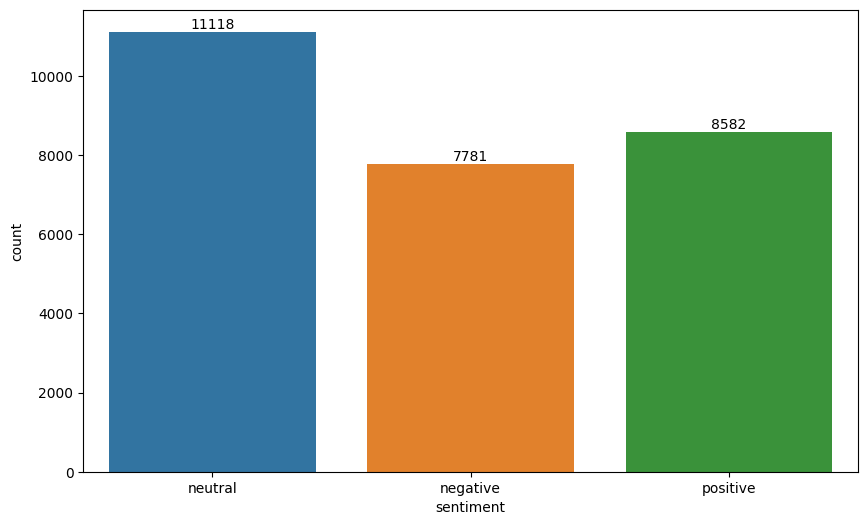

In [9]:
ax = sns.countplot(data = train_df, x = "sentiment")
ax.bar_label(ax.containers[0]);

In [10]:
train_df["sentiment"].value_counts()

sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

In [13]:
train_df = train_df[["text", "sentiment", "Time of Tweet", "Country", "Age of User"]]
test_df = test_df[["text", "sentiment", "Time of Tweet", "Country", "Age of User"]]

In [14]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [15]:
train_df2 = train_df.copy()

In [16]:
train_df2["text"].head()

0                  I`d have responded, if I were going
1        Sooo SAD I will miss you here in San Diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4     Sons of ****, why couldn`t they put them on t...
Name: text, dtype: object

In [17]:
test_df2 = test_df.copy()

In [18]:
test_df2["text"].head()

0    Last session of the day  http://twitpic.com/67ezh
1     Shanghai is also really exciting (precisely -...
2    Recession hit Veronique Branquinho, she has to...
3                                          happy bday!
4               http://twitpic.com/4w75p - I like it!!
Name: text, dtype: object

## Data Cleaning

In [19]:
import re

In [20]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/melissamayer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/melissamayer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/melissamayer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
negative_auxiliary_verbs = ["no", 'not', "n't", 'ain', 'aren', "aren't", 'couldn', "couldn't", "didn't",
                            "doesn't", "don't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
                            'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',"needn't", 'shan', "shan't", 'shouldn',
                            "shouldn't", 'wasn', "wasn't", 'weren', "weren't","won't", 'wouldn', "wouldn't"]

In [26]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [27]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [28]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/melissamayer/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
cleaning_text = train_df2["text"].apply(cleaning)
cleaning_text.head()

0                   responded going
1           sooo sad miss san diego
2                      bos bullying
3             interview leave alone
4    son put release already bought
Name: text, dtype: object

In [30]:
cleaning_text = test_df2["text"].apply(cleaning)
cleaning_text.head()

0                                     last session day
1    shanghai also really exciting precisely skyscr...
2    recession hit veronique branquinho quit compan...
3                                           happy bday
4                                                 like
Name: text, dtype: object

## Features and Labels

In [31]:
train_df2 = train_df2[["sentiment", "text"]]
train_df2.head()

,sentiment,text
0,neutral,"I`d have responded, if I were going"
1,negative,Sooo SAD I will miss you here in San Diego!!!
2,negative,my boss is bullying me...
3,negative,what interview! leave me alone
4,negative,"Sons of ****, why couldn`t they put them on t..."


In [32]:
test_df2 = test_df2[["sentiment", "text"]]
test_df2.head()

,sentiment,text
0,neutral,Last session of the day http://twitpic.com/67ezh
1,positive,Shanghai is also really exciting (precisely -...
2,negative,"Recession hit Veronique Branquinho, she has to..."
3,positive,happy bday!
4,positive,http://twitpic.com/4w75p - I like it!!


## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train = train_df2["text"]
y_train= train_df2["sentiment"]
X_test = test_df2["text"]
y_test = test_df2["sentiment"]

## Vectorization

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3, ngram_range=(1,2), max_features=2000)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [38]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [39]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,able,absolutely,abt,access,accident,account,ace,ache,across,act,action,actually,ad,add,added,addicted,advice,afford,afraid,afternoon,age,ago,agree,ah,aha,...,xd,xo,xoxo,ya,yall,yard,yay,yea,yeah,year,year ago,year old,yep,yes,yesterday,yet,yo,york,young,youre,youtube,yr,yum,yummy,yup
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Building

In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_count, y_train)

LogisticRegression()

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_count)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.73      0.66      0.69      1001
     neutral       0.65      0.74      0.69      1430
    positive       0.80      0.71      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.72      0.71      0.71      3534
weighted avg       0.72      0.71      0.71      3534



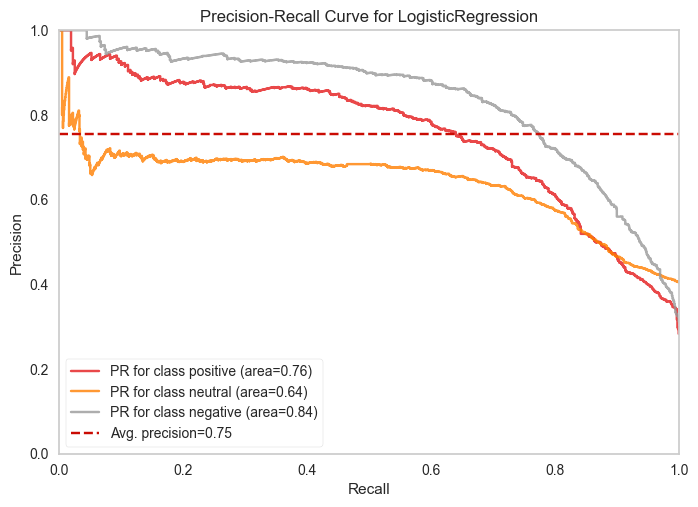

In [99]:
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression()

# Create the Precision-Recall Curve visualizer
viz = PrecisionRecallCurve(
    model,
    classes=["positive", "neutral", "negative"],  
    per_class=True,
    cmap="Set1"
)

# Fit the visualizer with the training data
viz.fit(X_train_count, y_train)

# Evaluate on the test data
viz.score(X_test_count, y_test)

# Display the Precision-Recall Curve
viz.show();

In [46]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_count, y_train)

RandomForestClassifier()

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_count)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.68      0.68      0.68      1001
     neutral       0.67      0.65      0.66      1430
    positive       0.74      0.76      0.75      1103

    accuracy                           0.69      3534
   macro avg       0.70      0.70      0.70      3534
weighted avg       0.69      0.69      0.69      3534



## TF-IDF

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
# Fit the vectorizer on the training data
vectorizer = TfidfVectorizer(max_features=2000)  
X_train_tf_idf = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tf_idf = vectorizer.transform(X_test)

In [62]:
print("Training data shape:", X_train_tf_idf.shape)
print("Test data shape:", X_test_tf_idf.shape)

Training data shape: (27480, 2000)
Test data shape: (3534, 2000)


In [52]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aaaah,aaah,aaahhh,aah,aaron,ab,abandoned,abandoning,abby,ability,abit,able,absolutely,absolutly,abt,abusive,ac,academy,accept,accepted,accepting,access,accident,accidentally,accomplish,...,youth,youtube,youu,yr,yt,yu,yuck,yucky,yum,yumm,yummy,yup,yur,zac,zach,zachary,zack,ze,zealand,zero,zoe,zombie,zone,zoo,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Building

In [54]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [56]:
y_pred = nb.predict(X_test_tf_idf)

In [57]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6471420486700622
Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.52      0.61      1001
     neutral       0.56      0.77      0.65      1430
    positive       0.77      0.60      0.68      1103

    accuracy                           0.65      3534
   macro avg       0.69      0.63      0.64      3534
weighted avg       0.67      0.65      0.65      3534

Confusion Matrix:
 [[ 524  446   31]
 [ 164 1100  166]
 [  37  403  663]]


In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X_train_tf_idf, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.63300582 0.63937409 0.64974527 0.64756186 0.64592431]
Mean Accuracy: 0.6431222707423581


In [63]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.4, max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_tf_idf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.27      0.09      0.13      1001
     neutral       0.40      0.84      0.54      1430
    positive       0.30      0.06      0.10      1103

    accuracy                           0.38      3534
   macro avg       0.32      0.33      0.26      3534
weighted avg       0.33      0.38      0.29      3534



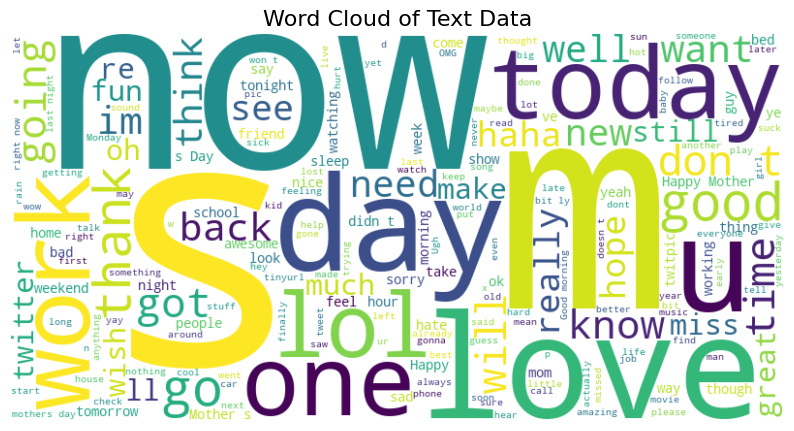

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text into a single string
text = " ".join(train_df2['text'].astype(str).tolist())

# Create the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',  
    max_words=200,      
    stopwords=None      
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.title('Word Cloud of Text Data', fontsize=16)
plt.show()


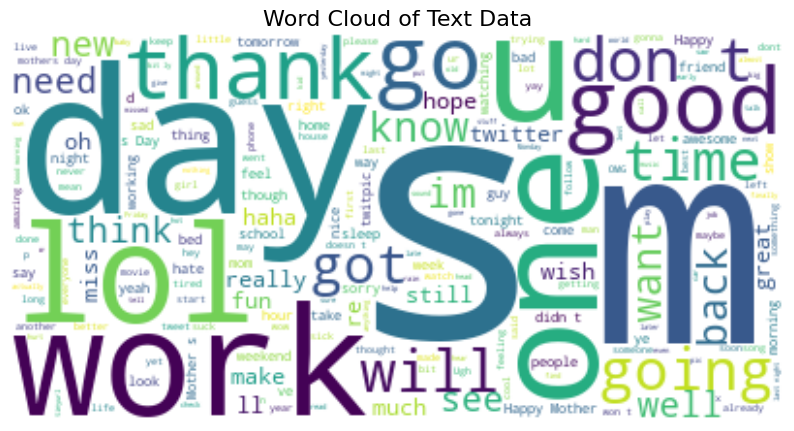

In [68]:
from wordcloud import STOPWORDS
custom_stopwords = set(STOPWORDS).union({'now', 'today', 'love'})
wordcloud = WordCloud(
    stopwords=custom_stopwords,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.title('Word Cloud of Text Data', fontsize=16)
plt.show()

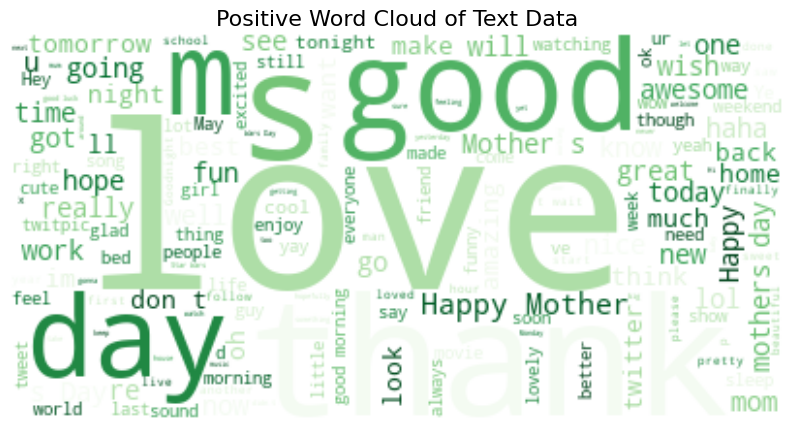

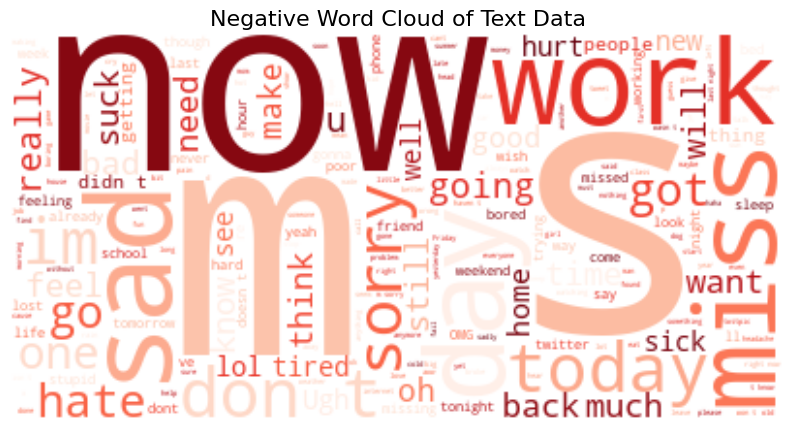

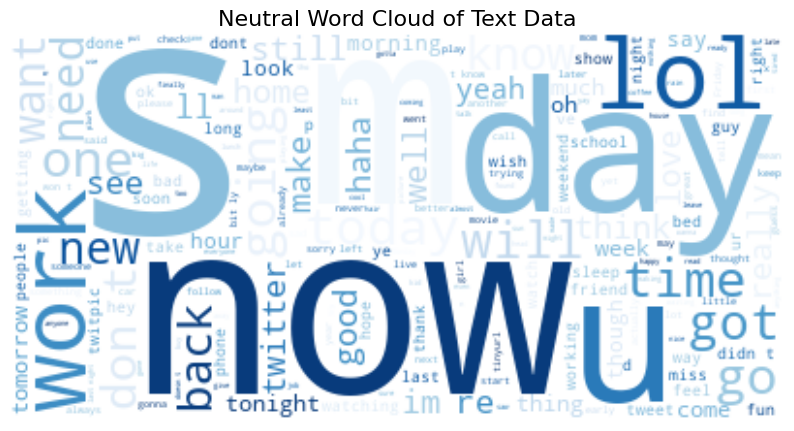

In [73]:
positive_text = " ".join(train_df2[train_df2['sentiment'] == 'positive']['text'].astype(str).tolist())
negative_text = " ".join(train_df2[train_df2['sentiment'] == 'negative']['text'].astype(str).tolist())
neutral_text = " ".join(train_df2[train_df2['sentiment'] == 'neutral']['text'].astype(str).tolist())

# Generate separate word clouds for each sentiment
positive_wordcloud = WordCloud(background_color='white', colormap='Greens').generate(positive_text)
negative_wordcloud = WordCloud(background_color='white', colormap='Reds').generate(negative_text)
neutral_wordcloud = WordCloud(background_color='white', colormap='Blues').generate(neutral_text)

# Plot the positive word cloud
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.title('Positive Word Cloud of Text Data', fontsize=16)
plt.show()


# Plot the negative word cloud
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.title('Negative Word Cloud of Text Data', fontsize=16)
plt.show()

# Plot the neutral word cloud
plt.figure(figsize=(10, 6))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.title('Neutral Word Cloud of Text Data', fontsize=16)
plt.show()

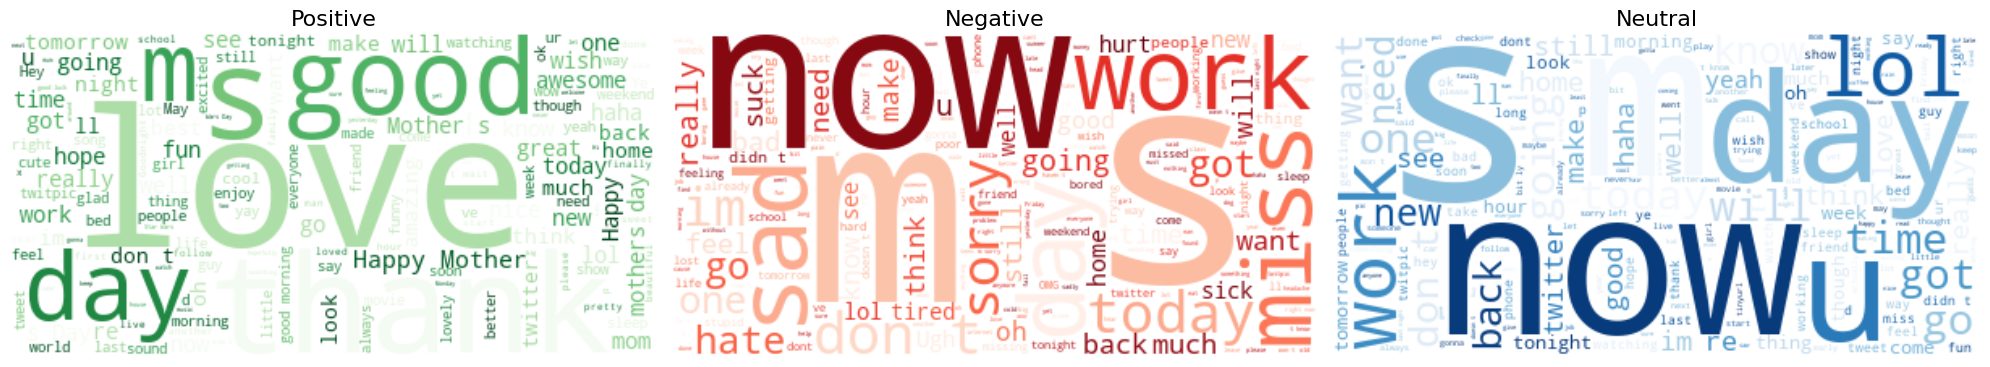

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Positive', fontsize=16)

axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Negative', fontsize=16)

axs[2].imshow(neutral_wordcloud, interpolation='bilinear')
axs[2].axis('off')
axs[2].set_title('Neutral', fontsize=16)

plt.tight_layout()
plt.show()


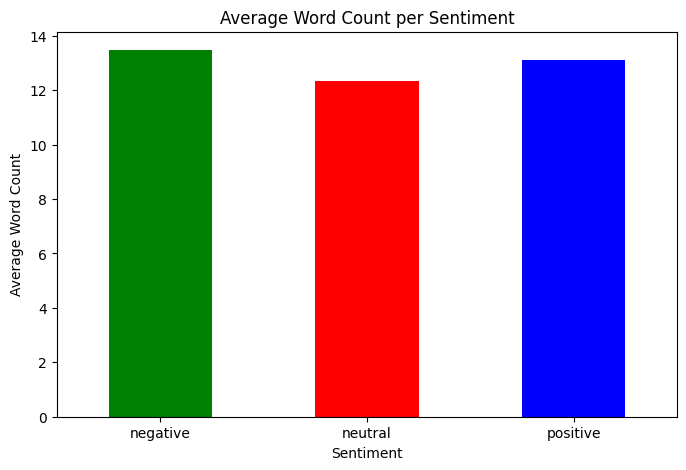

In [76]:
# Add a column for word count
train_df2['word_count'] = train_df2['text'].apply(lambda x: len(x.split()))

# Calculate average word count for each sentiment
avg_word_count = train_df2.groupby('sentiment')['word_count'].mean()

# Plot average word count
plt.figure(figsize=(8, 5))
avg_word_count.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Average Word Count per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)
plt.show()